In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
import tensorflow.keras.utils as tku

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [6]:
print(mnist)

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ..

In [5]:
print(mnist['data'][0])

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel7

In [8]:
X, y= mnist['data'], mnist['target']

In [9]:
print(X)

       pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel7

In [10]:
print(y)

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


In [11]:
X.shape

(70000, 784)

In [12]:
y.shape

(70000,)

In [17]:
demo_digit= X.iloc[675, :]
demo_digit= np.array(demo_digit).reshape(28,28)

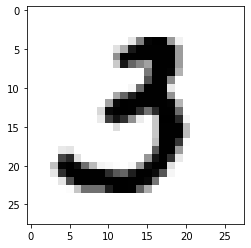

In [18]:
plt.imshow(demo_digit, cmap= matplotlib.cm.binary, interpolation='nearest')

In [19]:
print(y[675])

3


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [22]:
cnn= tf.keras.Sequential()

In [23]:
cnn.add(tf.keras.layers.Dense(64, activation='relu', input_dim=784))
cnn.add(tf.keras.layers.Dense(64, activation='relu'))
cnn.add(tf.keras.layers.Dense(10, activation='softmax'))

In [24]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
cnn.fit(X_train, tku.to_categorical(y_train), epochs= 5, batch_size=32)

Epoch 1/5
1750/1750 [==============================] - 9s 4ms/step - loss: 1.5050 - accuracy: 0.8288
Epoch 2/5
1750/1750 [==============================] - 7s 4ms/step - loss: 0.3715 - accuracy: 0.9091
Epoch 3/5
1750/1750 [==============================] - 7s 4ms/step - loss: 0.3118 - accuracy: 0.9208
Epoch 4/5
1750/1750 [==============================] - 7s 4ms/step - loss: 0.2716 - accuracy: 0.9327
Epoch 5/5
1750/1750 [==============================] - 7s 4ms/step - loss: 0.2388 - accuracy: 0.9386


In [26]:
cnn.evaluate(X_test, tku.to_categorical(y_test))

438/438 [==============================] - 2s 3ms/step - loss: 0.2574 - accuracy: 0.9346


[0.25742700695991516, 0.9345714449882507]

In [27]:
test_image= X.iloc[675, :]

In [28]:
test_image = np.expand_dims(test_image, axis=0)
result= cnn.predict(test_image)
print(result)

1/1 [==============================] - 0s 240ms/step
[[1.5767649e-12 4.1550629e-19 8.8030356e-07 9.9997127e-01 1.6947120e-16
  2.7945820e-05 3.0593804e-21 2.8326905e-08 2.3295207e-12 4.0738607e-10]]
